In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist_data = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [9]:
train_X = mnist_data.train.images
train_y  = mnist_data.train.labels

test_X = mnist_data.test.images
test_y = mnist_data.train.labels

print('Train data is %d images.' %train_X.shape[0])
print('Test data is %d images.' %test_X.shape[0])

Train data is 55000 images.
Test data is 10000 images.


## Visualize some random images

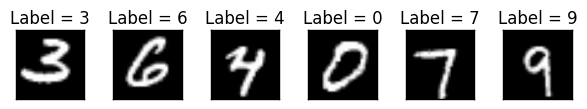

In [30]:
fig = plt.figure()
select_img = np.random.choice(train_X.shape[0], size=6, replace=False)
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1)
    plt.imshow(train_X[select_img[i],:].reshape((28, 28)), cmap=cm.gray)
    plt.title('Label = %d'  %np.argmax(train_y[select_img[i],:]))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

## Logistic Regression 

In [67]:
class LRModel(object):
    def __init__(self, train_X, train_y, test_X, test_y):
        self.train_X = train_X
        self.train_y = train_y
        self.test_X = test_X
        self.test_y = test_y
        
        self._build_graph()
        self.session = tf.Session(graph=self.graph)
        self.session.run(self.init_op)
    
    def _build_graph(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            self.x_holder = tf.placeholder(tf.float32, shape=[None, 784])
            self.y_holder = tf.placeholder(tf.float32, shape=[None, 10])
        
            self.w = tf.Variable(initial_value=tf.truncated_normal([784, 10]))
            self.b = tf.Variable(initial_value=tf.zeros([10]))
        
            self.logits = tf.matmul(self.x_holder, self.w) + self.b
            self.pred_ = tf.nn.softmax(self.logits)
        
            self.cost = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.y_holder))
        
            self.optimizer = tf.train.GradientDescentOptimizer(0.01)
            self.train_op = self.optimizer.minimize(self.cost)
            self.init_op = tf.initialize_all_variables()
    
    def fit(self, n_steps):
        for idx in range(n_steps):
            cur_loss, _ = self.session.run([self.cost, self.train_op], feed_dict={self.x_holder: self.train_X[:50,:],
                                                                              self.y_holder: self.train_y[:50,:]})
            print('step %d - loss = %f' %((idx+1, cur_loss)))

In [68]:
model = LRModel(train_X, train_y, test_X, test_y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [79]:
model.fit(200)

step 1 - loss = 1.626851
step 2 - loss = 1.622130
step 3 - loss = 1.617427
step 4 - loss = 1.612740
step 5 - loss = 1.608070
step 6 - loss = 1.603417
step 7 - loss = 1.598781
step 8 - loss = 1.594161
step 9 - loss = 1.589557
step 10 - loss = 1.584970
step 11 - loss = 1.580399
step 12 - loss = 1.575844
step 13 - loss = 1.571305
step 14 - loss = 1.566781
step 15 - loss = 1.562273
step 16 - loss = 1.557781
step 17 - loss = 1.553304
step 18 - loss = 1.548842
step 19 - loss = 1.544395
step 20 - loss = 1.539964
step 21 - loss = 1.535547
step 22 - loss = 1.531145
step 23 - loss = 1.526758
step 24 - loss = 1.522386
step 25 - loss = 1.518027
step 26 - loss = 1.513684
step 27 - loss = 1.509354
step 28 - loss = 1.505038
step 29 - loss = 1.500737
step 30 - loss = 1.496449
step 31 - loss = 1.492175
step 32 - loss = 1.487915
step 33 - loss = 1.483668
step 34 - loss = 1.479435
step 35 - loss = 1.475214
step 36 - loss = 1.471008
step 37 - loss = 1.466815
step 38 - loss = 1.462634
step 39 - loss = 1.45